In [1]:
import pylab as pl
import pandas as pd
import numpy as np
from ggplot import *
%matplotlib inline
np.random.seed(1335)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("201502-citibike-tripdata.csv")

In [3]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [4]:
df_male= 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df_female = 2015-df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [5]:
male = pd.DataFrame(df_male)
male = {'age':list(male['birth year']),'Gender':'Male'}
male = pd.DataFrame(male)

female = pd.DataFrame(df_female)
female = {'age':list(female['birth year']),'Gender':'Female'}
female = pd.DataFrame(female)

In [6]:
frame = [male,female]
agedata = pd.concat(frame)

stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


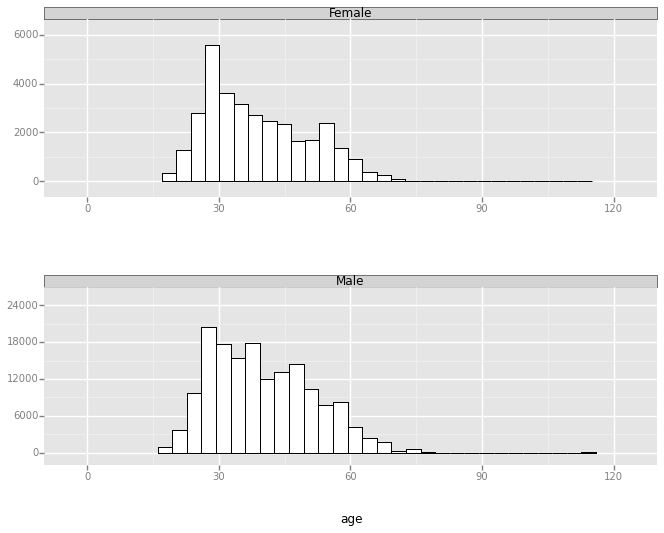

<ggplot: (279630509)>

In [7]:
ggplot(aes(x='age'), data=agedata)+ geom_histogram(fill='white',colour='black')+facet_grid('Gender',scales="free")

In [8]:
import scipy.stats
ks=scipy.stats.ks_2samp(male['age'], female['age'])
print ks

Ks_2sampResult(statistic=0.062128380458762511, pvalue=1.3982662912454268e-92)


In [9]:
male = male[~np.isnan(male['age'])]
female = female[~np.isnan(female['age'])]
format_male = np.random.choice(male['age'],len(female['age']),replace=False)
print scipy.stats.pearsonr(format_male, female['age'])
print scipy.stats.spearmanr(format_male, female['age'])

(-0.0038605605836730676, 0.48270319995168476)
SpearmanrResult(correlation=-0.0046625674469241195, pvalue=0.39655441693238047)


In [10]:
df['date'] = pd.to_datetime(df['starttime'])
df['hour'] = df['date'].dt.hour

age_dt = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] >= 6) & (df['hour']<=19))]
age_nt = 2015-df['birth year'][(df['usertype'] == 'Subscriber')&((df['hour'] > 19) | (df['hour']<6))]


In [11]:
dt = pd.DataFrame(age_dt)
dt = {'age':list(dt['birth year']),'Type':'Daytime'}
dt = pd.DataFrame(dt)

nt = pd.DataFrame(age_nt)
nt = {'age':list(nt['birth year']),'Type':'Nighttime'}
nt = pd.DataFrame(nt)

In [12]:
frame = [dt,nt]
agedata = pd.concat(frame)

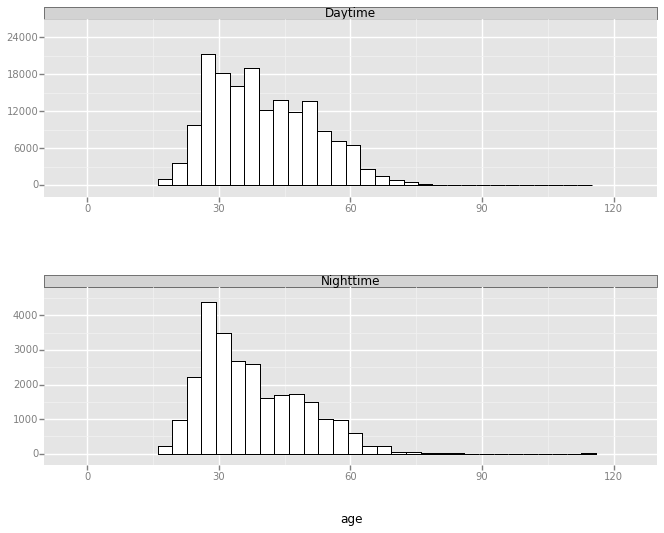

<ggplot: (281428545)>

In [13]:
ggplot(aes(x='age'), data=agedata)+ geom_histogram(fill='white',colour='black')+facet_grid('Type',scales="free")

In [14]:
ks=scipy.stats.ks_2samp(dt['age'], nt['age'])
print ks

Ks_2sampResult(statistic=0.11746583152066226, pvalue=9.3700937067765759e-273)


In [15]:
dt = dt[~np.isnan(dt['age'])]
nt = nt[~np.isnan(nt['age'])]
format_dt = np.random.choice(dt['age'],len(nt['age']),replace=False)

print scipy.stats.pearsonr(format_dt, nt['age'])
print scipy.stats.spearmanr(format_dt, nt['age'])

(0.0012475902697108626, 0.83991979024903629)
SpearmanrResult(correlation=0.0043428636995721031, pvalue=0.48196121046432816)
